<a href="https://colab.research.google.com/github/Gowr93/DNN-NLP-Practise-Session-/blob/main/Digits_MultiClass_Classification_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras import Sequential

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


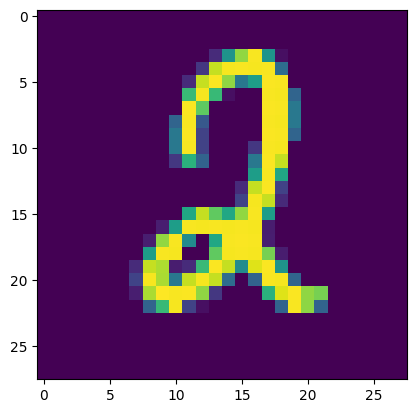

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[55100])# image show
plt.show()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Feature scaling is required # normalization is done only by 255 only. no standardisation , normalisation is required
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0]

# nor -values or more than 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

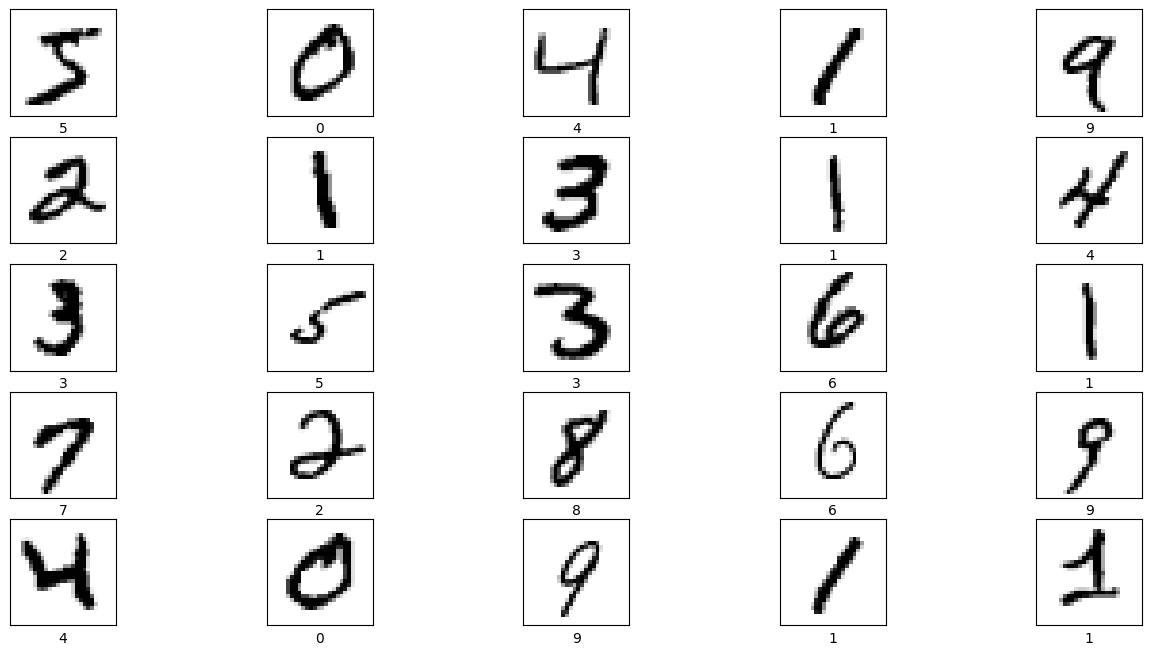

In [ ]:
# check more images # Train Data

plt.figure(figsize =(16,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(y_train[i])

plt.show()

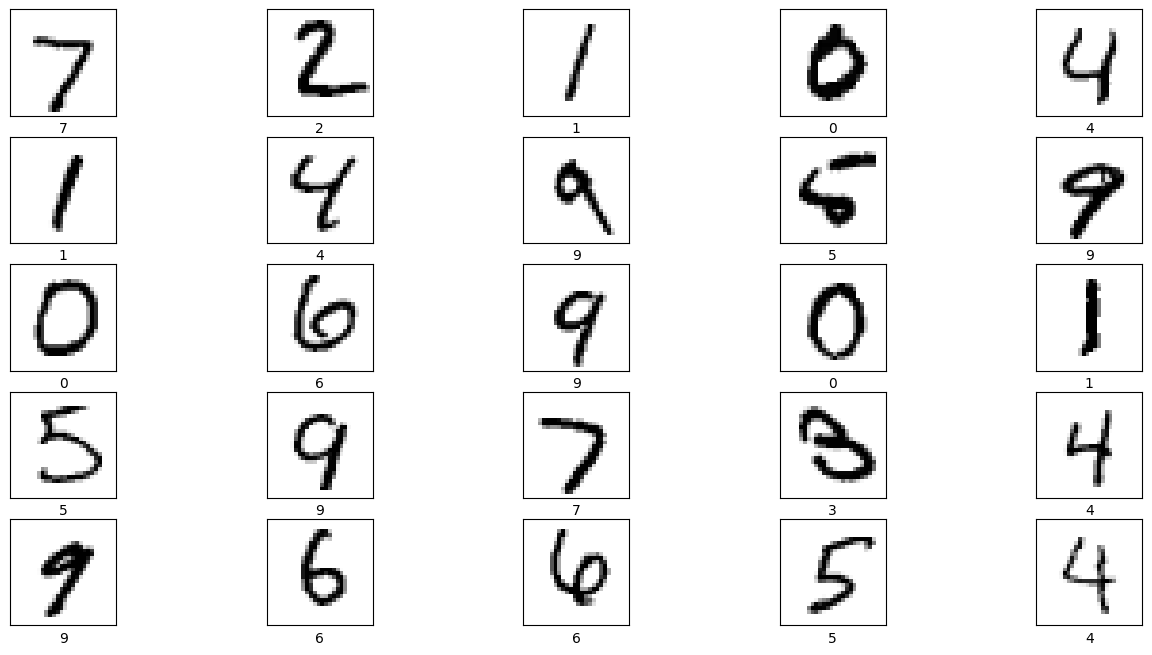

In [ ]:
# train data

plt.figure(figsize = (16,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(y_test[i])

plt.show()

In [ ]:
## Building Multilayer perceptron model
model = Sequential()
# converting image 2D to 1D - Flatten
model.add(Flatten(input_shape = (28,28)))
#first hidden layer
model.add(Dense(128,activation = 'relu'))
# second hidden layer
model.add(Dense(32,activation = 'relu'))
# output # for multiclass classification
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784*128+128


100480

In [ ]:
128*32+32

4128

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, epochs = 25, batch_size =128, validation_data=(x_test,y_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7990 - loss: 0.6911 - val_accuracy: 0.9514 - val_loss: 0.1658
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9541 - loss: 0.1564 - val_accuracy: 0.9641 - val_loss: 0.1189
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9706 - loss: 0.1023 - val_accuracy: 0.9700 - val_loss: 0.0953
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9764 - loss: 0.0769 - val_accuracy: 0.9738 - val_loss: 0.0840
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9730 - val_loss: 0.0864
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9749 - val_loss: 0.0802
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9786 - val_loss: 0.0720
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9901 - loss: 0.0334 - val_accuracy: 0.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
469*128

60032

In [ ]:
60000/128

468.75

In [ ]:
#history1 = model.fit(x_train,y_train, epochs = 25, validation_data = (x_test,y_test))
history1 = model.fit(x_train, y_train, epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9775 - val_loss: 0.1051
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9764 - val_loss: 0.1231
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9751 - val_loss: 0.1304
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9756 - val_loss: 0.1280
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9747 - val_loss: 0.1503
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9771 - val_loss: 0.1366
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9968 - loss: 0.0104 - val_accuracy: 0.9752 - val_loss: 0.1442
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9961 - loss: 0.012

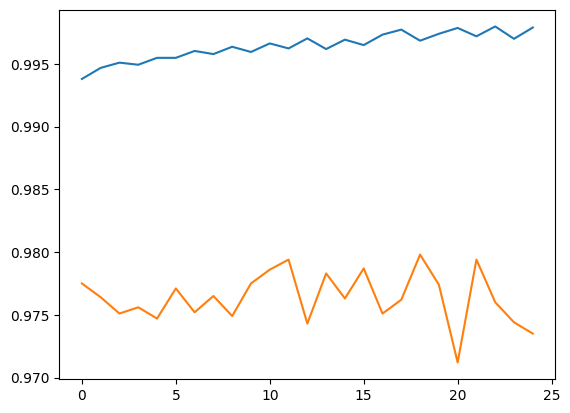

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

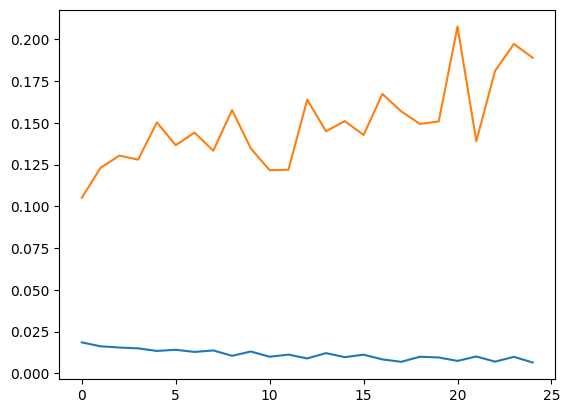

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
y_prob = model.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.79586394e-23, 4.79860271e-23, 4.80176527e-25, ...,
        9.99999940e-01, 2.00644503e-24, 2.35696430e-18],
       [1.26080335e-25, 1.41120859e-18, 9.99999940e-01, ...,
        9.88414180e-30, 3.33833681e-19, 1.00877840e-36],
       [9.00595737e-17, 9.99999940e-01, 4.02115277e-12, ...,
        1.12230183e-10, 3.08587834e-12, 3.21764418e-19],
       ...,
       [6.28270874e-33, 8.18868498e-21, 0.00000000e+00, ...,
        1.87199019e-16, 1.81067209e-27, 1.57453082e-21],
       [5.10604127e-30, 2.42256970e-33, 1.26252536e-34, ...,
        3.98739119e-29, 8.79261280e-15, 1.20006838e-34],
       [3.63987521e-24, 1.53689400e-23, 1.77509639e-33, ...,
        3.66164602e-37, 3.57673034e-36, 6.19755290e-36]], dtype=float32)

In [ ]:
y_prob = y_prob.argmax(axis = 1)
y_prob

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prob)

0.9735

## Databetes Dataset Classification Problem

In [44]:
# @title Default title text
import pandas as pd
import os
import numpy as np

datasample = pd.read_csv('/content/diabetes(1).csv')
datasample.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
datasample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
datasample.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
datasample.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
datasample.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [39]:
datasample.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [41]:
datasample.duplicated().sum()

np.int64(0)

In [43]:
datasample.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
# filling the values with median
datasample['Glucose'] = np.where(datasample['Glucose']== 0 , datasample['Glucose'].median(),datasample['Glucose'])
datasample['BloodPressure'] = np.where(datasample['BloodPressure'] == 0, datasample['BloodPressure'].median(),datasample['BloodPressure'])
datasample['SkinThickness'] = np.where(datasample['SkinThickness']==0, datasample['SkinThickness'].median(),datasample['SkinThickness'])
datasample['Insulin'] = np.where(datasample['Insulin']== 0 , datasample['Insulin'].median(), datasample['Insulin'])
datasample['BMI'] = np.where(datasample['BMI'] == 0 , datasample['BMI'].median(), datasample['BMI'])

In [46]:
datasample.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0


In [48]:
# feature scaling

x = datasample.iloc[:,:-1]
y = datasample.iloc[:,-1]

In [50]:
y.value_counts()/len(y)*100

,count
Outcome,
0,65.104167
1,34.895833


In [51]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [52]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [54]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 42, stratify = y)

In [55]:
x_train.shape

(614, 8)

In [56]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [57]:
from keras.layers import BatchNormalization, Dropout

## Model Building - MLP DNN

In [58]:
dnn = Sequential()
dnn.add(Dense(32,activation = 'relu', input_dim = 8))
#dnn.add(BatchNormalization())
dnn.add(Dropout(0.25))
dnn.add(Dense(16,activation = 'relu'))
dnn.add(Dropout(0.50))
dnn.add(Dense(1, activation = 'sigmoid'))
dnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
dnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = dnn.fit(x_train_sc, y_train, epochs = 50 , validation_data=(x_test_sc, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5620 - loss: 0.6906 - val_accuracy: 0.7013 - val_loss: 0.6500
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6393 - loss: 0.6897 - val_accuracy: 0.7208 - val_loss: 0.6204
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6863 - loss: 0.6378 - val_accuracy: 0.7013 - val_loss: 0.5930
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6613 - loss: 0.6319 - val_accuracy: 0.7013 - val_loss: 0.5695
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7306 - loss: 0.5703 - val_accuracy: 0.7143 - val_loss: 0.5526
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5702 - val_accuracy: 0.7078 - val_loss: 0.5415
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7320 - loss: 0.5293 - val_accuracy: 0.7208 - val_loss: 0.5322
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7487 - loss: 0.5147 - val_accuracy: 0.7143 - val_loss